## LDA (Latent Dirichlet Allocation)
潜在狄利克雷分布模型（Latent Dirichlet Allocation, LDA）于 2003 年由Blei 等人提出，是目前非监督机器学习领域的经典主题模型。<br>
LDA 是一个多层次贝叶斯模型，将参数视为随机变量用超参数予以控制，体现彻底的概率统计思想，利用概率生成模型；该模型可从大量文本数据集中挖掘出潜在的主题信息，具有良好的扩展性。

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import lda
import lda.datasets
import warnings
warnings.filterwarnings("ignore")

### 法一：利用Gensim进行主题建模

#### 语料准备

In [2]:
name = 'JAN'  # 2020.01微博新冠疫情相关文本评论样本
path = 'data/疫情主题2020/'
datapath = path+'X_'+name+'.txt'
datasave = path+'X_'+name+'.csv'

In [3]:
doc_clean = []
with open(datapath ,'r',encoding='UTF-8') as f:
    for line in f:
        doc_clean.append(list(line.strip(' ').split()))
print(doc_clean[:10])

[['江苏', '新增', '例', '新冠肺炎', '天', '江苏', '幸免', '求求', '加', '看', '有', '嫌疑', '处', '乱窜', '少', '感染'], ['武汉市', '新冠肺炎', '防控', '指挥部', '发布', '号', '通告', '范围', '断', '病毒播', '途径', '现', '营运', '车', '理', '有关', '事项', '通告', '年月日时', '武汉市', '网约', '出租车', '停止', '运营', '巡游', '出租车', '实行', '双', '号', '限行', '恢复', '时间', '行', '通告', '记', '张锐', '夏静'], ['武汉', '新冠肺炎', '社', '捐赠', '方式'], ['江苏', '新增', '例', '新冠肺炎', '希望', '锡', '封城', '死'], ['江苏', '新增', '例', '新冠肺炎', '天', '上午', '例'], ['江苏', '新增', '例', '新冠肺炎', '知道', '说', '什', '家', '少', '出门', '洗手', '希望', '平安'], ['江苏', '新增', '例', '新冠肺炎', '睡前', '刷', '微博越', '刷', '越方', '劝', '住', '出门', '口罩'], ['江苏', '新增', '例', '新冠肺炎', '难眠'], ['容', '分享', '嘉兴', '发布', '新冠肺炎', '疫情', '防控', '号', '通告', '禾', '点点', '关', '加强', '新型冠状病毒', '感染', '肺炎', '疫情', '防控', '工作', '通告', '号', '全力', '维护', '市', '公众', '身体健康', '生命安全', '坚决', '有效', '遏制', '疫情', '全市', '发', '网页', '链接'], ['江苏', '新增', '例', '新冠肺炎', '中国', '加油', '江苏', '加油', '徐州', '加油']]


In [4]:
# 创建语料的词语词典，每个单独的词语都会被赋予一个索引
dictionary = corpora.Dictionary(doc_clean) #未限制高频词个数

# 使用上面的词典，将转换文档列表（语料）变成 DT 矩阵
corpus = [dictionary.doc2bow(doc) for doc in doc_clean]

#### 确定主题个数
**perplexity困惑度计算、coherence一致性检验**
[博文参考](https://blog.csdn.net/weixin_44585839/article/details/106500139)

In [7]:
# 困惑度计算和一致性检验
perplexity_values = []
coherence_values = []
model_list = []

for topic in range(20):
    lda_model = gensim.models.LdaMulticore(corpus = corpus, num_topics=topic+1, id2word = dictionary, random_state=100, 
                                           chunksize=100, passes=10, per_word_topics=True)
    perplexity = pow(2,-lda_model.log_perplexity(corpus)) 
    print(perplexity,end='\t')
    perplexity_values.append(round(perplexity,3))
    
    model_list.append(lda_model)
    coherencemodel = CoherenceModel(model=lda_model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
    coherence_values.append(round(coherencemodel.get_coherence(),3))


209.01029511249922	192.9409703077879	197.08640482311796	189.5514272171009	193.9975679333413	191.31833182104054	190.752945394183	190.53135051657264	193.40127205796995	197.8672702145328	242.68138515786384	271.2383731900723	270.29280267229194	257.8143273201221	306.3651416946242	294.98437271804016	284.6169309440243	314.4780060054998	362.48491162434266	391.79263655572794	

In [10]:
def graph_draw(topic, values,ylabel):  # 做主题数与困惑度的折线图
    x = range(1,topic+1)
    y = values
    plt.plot(x, y, color="#4e79a7", linewidth=2)
    plt.xlabel("Number of Topic")
    plt.ylabel(ylabel)
    plt.show()

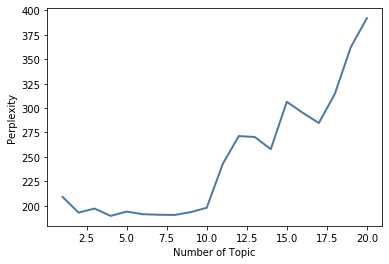

In [11]:
graph_draw(20, perplexity_values,"Perplexity")

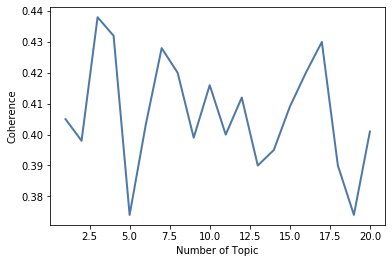

In [12]:
graph_draw(20, coherence_values,"Coherence")

观察困惑度和一致性曲线拐点，该样本可选择10个主题。

#### LDA建模

In [13]:
# 使用 gensim 来创建 LDA 模型对象
Lda = gensim.models.ldamodel.LdaModel

# 在 DT 矩阵上运行和训练 LDA 模型
ldamodel = Lda(corpus, num_topics=10, id2word = dictionary, passes=50)

In [14]:
# 输出结果
print(ldamodel.print_topics(num_topics=10, num_words=20))

[(0, '0.060*"新冠肺炎" + 0.044*"江苏" + 0.043*"例" + 0.036*"新增" + 0.015*"确诊" + 0.013*"安徽" + 0.012*"武汉" + 0.010*"有" + 0.009*"真" + 0.006*"跑" + 0.005*"求求" + 0.005*"疫情" + 0.005*"回" + 0.005*"宣" + 0.004*"网民" + 0.004*"天" + 0.004*"徐州" + 0.004*"模式" + 0.004*"播" + 0.003*"重视"'), (1, '0.035*"有" + 0.022*"新冠" + 0.017*"病毒" + 0.016*"年" + 0.016*"家" + 0.014*"看" + 0.013*"说" + 0.013*"天" + 0.011*"真" + 0.011*"新冠肺炎" + 0.010*"想" + 0.010*"以" + 0.010*"希望" + 0.009*"什" + 0.008*"武汉" + 0.008*"双黄" + 0.008*"现" + 0.008*"口罩" + 0.007*"知道" + 0.006*"样"'), (2, '0.022*"医院" + 0.021*"新冠肺炎" + 0.021*"感染" + 0.014*"医生" + 0.013*"症状" + 0.012*"天" + 0.012*"治疗" + 0.011*"新冠" + 0.011*"发热" + 0.011*"有" + 0.011*"病毒" + 0.010*"隔离" + 0.010*"视频" + 0.010*"肺炎" + 0.010*"做" + 0.010*"武汉" + 0.008*"嗽" + 0.007*"新型冠状病毒" + 0.007*"疑似" + 0.007*"患"'), (3, '0.019*"医院" + 0.014*"孩子" + 0.013*"捐赠" + 0.012*"新冠肺炎" + 0.011*"肺炎" + 0.010*"防护" + 0.010*"疫情" + 0.008*"社" + 0.008*"接受" + 0.008*"新型" + 0.007*"需" + 0.007*"物资" + 0.007*"武汉" + 0.006*"抗击" + 0.006*"求" + 0.006*"父母" + 0.00

### 法二：LDA  
[LDA-python库](https://github.com/lda-project/lda)

In [16]:
if __name__ == "__main__":
   #存储读取语料 一行预料为一个文档 
    corpus = []
    for line in open(datapath, 'r',encoding='utf-8').readlines():
        #print line
        corpus.append(line.strip())
    #print corpus

    #将文本中的词语转换为词频矩阵 矩阵元素a[i][j] 表示j词在i类文本下的词频
    vectorizer = CountVectorizer(max_features=10000)
    X = vectorizer.fit_transform(corpus)
    analyze = vectorizer.build_analyzer()
    weight = X.toarray()
    # Get words that label the columns (needed to extract readable topics and make anchoring easier)
    words = list(np.asarray(vectorizer.get_feature_names()))

model = lda.LDA(n_topics=10, n_iter=200,random_state=1)  # 设定主题数为N；迭代次数为N
model.fit(np.asarray(weight))     # model.fit_transform(X) 也可行

INFO:lda:n_documents: 3000
INFO:lda:vocab_size: 10000
INFO:lda:n_words: 70590
INFO:lda:n_topics: 10
INFO:lda:n_iter: 200
INFO:lda:<0> log likelihood: -799729
INFO:lda:<10> log likelihood: -581477
INFO:lda:<20> log likelihood: -561563
INFO:lda:<30> log likelihood: -553485
INFO:lda:<40> log likelihood: -547620
INFO:lda:<50> log likelihood: -544689
INFO:lda:<60> log likelihood: -542512
INFO:lda:<70> log likelihood: -541197
INFO:lda:<80> log likelihood: -539172
INFO:lda:<90> log likelihood: -538856
INFO:lda:<100> log likelihood: -538203
INFO:lda:<110> log likelihood: -537462
INFO:lda:<120> log likelihood: -537017
INFO:lda:<130> log likelihood: -536934
INFO:lda:<140> log likelihood: -536165
INFO:lda:<150> log likelihood: -536456
INFO:lda:<160> log likelihood: -536347
INFO:lda:<170> log likelihood: -536034
INFO:lda:<180> log likelihood: -535965
INFO:lda:<190> log likelihood: -535610
INFO:lda:<199> log likelihood: -536112


In [17]:
topic_word = model.topic_word_
print(topic_word.shape)
topic_word

(10, 10000)


array([[9.37558597e-07, 9.37558597e-07, 9.37558597e-07, ...,
        9.37558597e-07, 1.88449278e-04, 9.37558597e-07],
       [9.82511299e-07, 9.82511299e-07, 9.92336412e-05, ...,
        9.82511299e-07, 9.82511299e-07, 9.82511299e-07],
       [3.41812401e-04, 1.13558937e-06, 1.13558937e-06, ...,
        1.13558937e-06, 1.13558937e-06, 1.13558937e-06],
       ...,
       [2.07684320e-06, 2.07684320e-06, 2.07684320e-06, ...,
        2.07684320e-06, 2.07684320e-06, 2.07684320e-06],
       [1.41964793e-06, 1.41964793e-06, 1.41964793e-06, ...,
        1.41964793e-06, 1.41964793e-06, 1.41964793e-06],
       [1.90005700e-06, 1.90005700e-06, 1.90005700e-06, ...,
        1.90005700e-06, 1.90005700e-06, 1.90005700e-06]])

In [18]:
# 得到每个主题前N个词
for i, topic_dist in enumerate(topic_word):
    print(np.array(words)[np.argsort(topic_dist)][:-16:-1])

['病例' '确诊' '感染' '肺炎' '新冠肺炎' '新型冠状病毒' '武汉' '医院' '新闻' '新型' '发热' '治疗' '出院'
 '目前' '新增']
['疫情' '防控' '工作' '新冠肺炎' '肺炎' '发布' '新型冠状病毒' '武汉' '关注' '指挥部' '抗击' '健康' '湖北'
 '新型' '行动']
['武汉' '加油' '新冠肺炎' '希望' '抗击' '新冠' '疫情' '中国' '平安' '万众心' '视频' '微博' '进入' '春节'
 '医护员']
['医院' '口罩' '捐赠' '防护' '疫情' '新冠肺炎' '物资' '抗击' '检测' '接受' '试剂盒' '新型冠状病毒' '湖北'
 '医护员' '医疗']
['病毒' '市场' '海鲜' '华南' '新冠' '野生动物' '野味' '证据确凿' '新冠肺炎' '微博' '视频' '民日报' '感染'
 '表示' '专家']
['新冠' '病毒' '双黄' '研究' '药物' '新型冠状病毒' '武汉' '抑制' '发现' '肺炎' '口服液' '新冠肺炎' '孩子'
 '视频' '中国']
['新冠' '病毒' '口罩' '中国' '出门' '肺炎' '院士' '时间' '疾控中心' '家里' '工作' '知道' '高福' '研发'
 '时候']
['新冠' '医院' '隔离' '医生' '感染' '病毒' '疑似' '武汉' '治疗' '居家' '视频' '湖北' '进行' '微博'
 '出现']
['新冠' '症状' '新冠肺炎' '病毒' '发热' '首发' '专家' '链接' '开始' '知道' '情况' '防护' '网页' '普通'
 '问题']
['新冠肺炎' '江苏' '新增' '确诊' '口罩' '武汉' '病例' '安徽' '陕西' '知道' '出门' '希望' '累计' '重视'
 '政府']


In [19]:
doc_topic = model.doc_topic_
print(doc_topic.shape)  # 主题分布式49322行，6列的矩阵，其中每一行对应一个训练样本在6个主题上的分布
print("第一个样本的主题分布是",doc_topic[0]) # 打印一下第一个样本的主题分布
print("第一个样本的最终主题是",doc_topic[0].argmax())

(3000, 10)
第一个样本的主题分布是 [0.01 0.21 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.71]
第一个样本的最终主题是 9
